In [1]:
!pip install arxiv

In [2]:
import arxiv

In [3]:
search = arxiv.Search(
  query = '"image synthesis"',
  #id_list: List[str] = [],
  max_results = 10000,
  sort_by = arxiv.SortCriterion.SubmittedDate,
  #sort_by: SortCriterion = SortCriterion.Relevanvce,
  sort_order = arxiv.SortOrder.Descending
)

- "deepfake"
- '"deep fake"'
- '"fake video"'
- '"video forgery"'
- '"image generation" "face"'
https://arxiv.org/abs/1503.00843 old survey

have to filter for astro

?? "video editing"
?? "image inpainting"

ARXIV time bias!!!!!

Elsevier?

Google Books?
https://books.google.com/ngrams/graph?content=image+inpainting&year_start=1970&year_end=2019&corpus=26&smoothing=3#


Demarkálni image-re mindenképp, de leginkább videora, kézi szerkesztés kizárásával, "deep" technológia kötelező?
Ha igen, az hasznos, mert arxiv elég jó mérőke. Korábbiaknál nem.

https://techcrunch.com/2022/08/24/deepfakes-for-all-uncensored-ai-art-model-prompts-ethics-questions/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAL_N0KPgrPTatZ5yioVgO4h53FEHQX0TXCTbM5MqiaFIjjDI6zfsbVDkotjkbRiTEOzgd7xaNe4sU_Qs1gvjpRG2tAZXmeIJlVD_y13huUzWRGeVzqwO2PD_1mSdl3ZoDSgIq2-8xW7awBjk0jJqtDpPQj7ZuBL21ISToI0kptNF

Stable diffusiont említeni kell!

https://www.louisbouchard.ai/imageworthoneword/

https://www.youtube.com/watch?v=nVhmFski3vg


Computer vision cycles:
https://books.google.com/ngrams/graph?content=computer+vision&year_start=1970&year_end=2019&corpus=26&smoothing=3&direct_url=t1%3B%2Ccomputer%20vision%3B%2Cc0#t1%3B%2Ccomputer%20vision%3B%2Cc0


Irodalom előbb reagál mint a populáris keresés:
https://books.google.com/ngrams/graph?content=deepfake&year_start=2013&year_end=2019&corpus=26&smoothing=3#
https://trends.google.com/trends/explore?date=2013-01-01%202019-01-01&q=deepfake

2018-ban robban be a köztudatba:
https://en.wikipedia.org/wiki/Deepfake (sok 2018-as dátum)

Utána is jól követhető a Google Trends és a wiki párhuzamossága


Innen összeszedni esetleg a commit gyakoriságot?
https://github.com/topics/deepfakes rekurzíve...


Check papers with code!!


Read: https://paperswithcode.com/paper/deepfake-definitions-performance-metrics-and !!!!!!



2017-es coining ok.


3 alap technológia: 
- photo editing
- rendering
- generative modeling



Arxiv: image synthesis kulcsszó CS-re szűrve jó lehet!

" használata harmadolja a találatokat


https://arxiv.org/search/advanced?advanced=&terms-0-operator=AND&terms-0-term=image+synthesis&terms-0-field=all&classification-computer_science=y&classification-physics_archives=all&classification-include_cross_list=include&date-filter_by=all_dates&date-year=&date-from_date=&date-to_date=&date-date_type=submitted_date&abstracts=show&size=50&order=-announced_date_first


diffusion models for deppfake:
https://youtu.be/_Y1-KlTEmwk

Github scrape:

https://github.com/search?p=1&q=deepfake&type=Repositories


!!!!!!!!!!!!!!!!!!!!!!!
Filter

https://github.com/xnbox/DeepfakeHTTP#how-does-it-work

!!!!!!!!!
Forks?????

Google: use Pytrends!!!!

https://lazarinastoy.com/the-ultimate-guide-to-pytrends-google-trends-api-with-python/

In [4]:
publish_dates = []

counter = 0
for result in search.results():
    #print(result.title)
    publish_dates.append(result.published)
    counter+=1
print(counter)

764


In [5]:
"cs" in result.primary_category

False

In [6]:
import pandas as pd

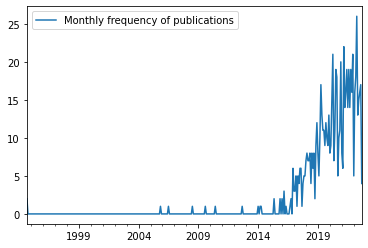

In [7]:
ax = pd.to_datetime(publish_dates).to_frame().resample("1M").count().plot()
ax.legend(labels=["Monthly frequency of publications"])
#.loc[lambda x: x >= pd.Timestamp("2014-01-01")]

 ARIMA(4,1,1)(0,0,0)[0] intercept
2022-09-30 00:00:00+00:00


[]

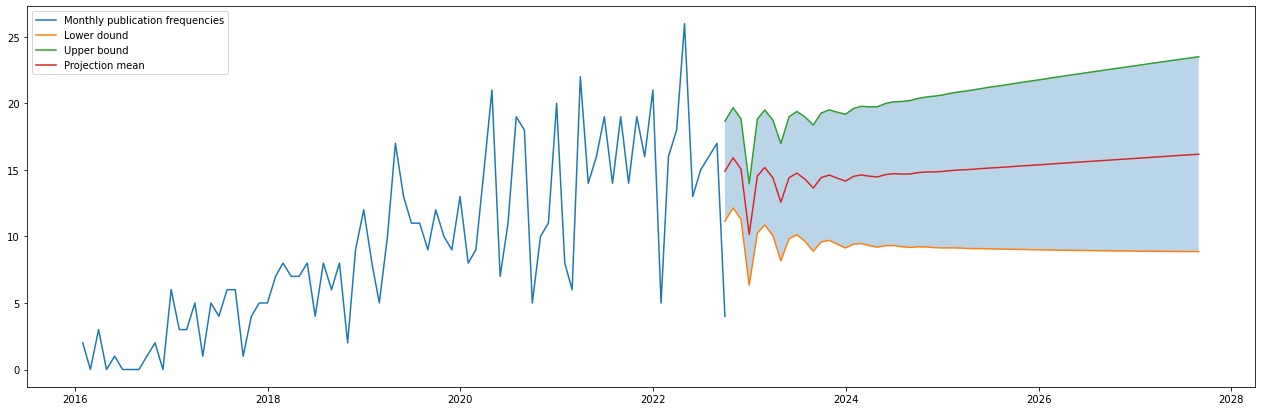

In [63]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

publish_df = pd.to_datetime(publish_dates).to_frame().resample("1M").count()

#publish_df = publish_df[publish_df.index.year >= 2016]


model = auto_arima(publish_df, start_p=0, start_q=0)
#model.fit(df)

def forecast_to_df(model, steps=10):
    forecast, conf_int = model.predict(n_periods=steps, return_conf_int=True)
    pred_df=pd.DataFrame()
    pred_df["lower"] = conf_int[:,0]
    pred_df["upper"] = conf_int[:,1]
    pred_df["pred"] = forecast.values
    return pred_df

STEPS = 60

pred_df = forecast_to_df(model, steps=STEPS)

print(model)
print(publish_df.index[-1])

pred_df.set_index(pd.date_range(start=publish_df.index[-1],periods=STEPS, freq="1M"), inplace=True)
fig, ax = plt.subplots(figsize=(22,7))
ax.plot(publish_df[publish_df.index.year >= 2016],label='Monthly publication frequencies')
ax.plot(pred_df, label=['Lower dound',"Upper bound",'Projection mean'])
ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
ax.legend()
plt.plot()

In [8]:
result.published

datetime.datetime(1994, 9, 8, 10, 1, 48, tzinfo=datetime.timezone.utc)

In [9]:
for element in result.__dict__.items():
    print(element)

('entry_id', 'http://arxiv.org/abs/adap-org/9409002v3')
('updated', datetime.datetime(1994, 9, 22, 14, 5, 44, tzinfo=datetime.timezone.utc))
('published', datetime.datetime(1994, 9, 8, 10, 1, 48, tzinfo=datetime.timezone.utc))
('title', "Secondary Image Synthesis In Electronic Computer Photography (Vtorichnyj Sintez Izobrazhenij V Elektronnoj Komp'Yuternoj Fotografii)")
('authors', [arxiv.Result.Author('Denis Juriev')])
('summary', 'The principal scheme of the secondary image synthesis in electronic computer\nphotography is described. The crucial role of the Clebsch-Gordan coefficient\ncalculus is pointed out.')
('comment', 'the text is written in Russian in AMSTEX with cyrillic fonts, 3 pages')
('journal_ref', None)
('doi', None)
('primary_category', 'adap-org')
('categories', ['adap-org', 'nlin.AO'])
('links', [arxiv.Result.Link('http://arxiv.org/abs/adap-org/9409002v3', title=None, rel='alternate', content_type=None), arxiv.Result.Link('http://arxiv.org/pdf/adap-org/9409002v3', titl

In [10]:
result._raw

{'id': 'http://arxiv.org/abs/adap-org/9409002v3',
 'guidislink': True,
 'link': 'http://arxiv.org/abs/adap-org/9409002v3',
 'updated': '1994-09-22T14:05:44Z',
 'updated_parsed': time.struct_time(tm_year=1994, tm_mon=9, tm_mday=22, tm_hour=14, tm_min=5, tm_sec=44, tm_wday=3, tm_yday=265, tm_isdst=0),
 'published': '1994-09-08T10:01:48Z',
 'published_parsed': time.struct_time(tm_year=1994, tm_mon=9, tm_mday=8, tm_hour=10, tm_min=1, tm_sec=48, tm_wday=3, tm_yday=251, tm_isdst=0),
 'title': "Secondary Image Synthesis In Electronic Computer Photography (Vtorichnyj\n  Sintez Izobrazhenij V Elektronnoj Komp'Yuternoj Fotografii)",
 'title_detail': {'type': 'text/plain',
  'language': None,
  'base': 'http://export.arxiv.org/api/query?search_query=%22image+synthesis%22&id_list=&sortBy=submittedDate&sortOrder=descending&start=700&max_results=100',
  'value': "Secondary Image Synthesis In Electronic Computer Photography (Vtorichnyj\n  Sintez Izobrazhenij V Elektronnoj Komp'Yuternoj Fotografii)"},

In [11]:
sum(1 for _ in search.results())

764